In [4]:
import pandas as pd

# 1. Importar datos y filtrar

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/PabloReyesPolanco/spotify/master/Spotify%20Weekly.csv")
df = df.drop(["url","time_signature","key","mode"], axis = 1)
df["duration_s"] = df["duration_ms"]/1000
df["duration_m"] = df["duration_ms"]/1000/60
df = df[df.year > 2016]
df = df.dropna(axis = 0)
df = df.sort_values(["start","position"])
df.reset_index(drop=True, inplace=True)


NameError: name 'k' is not defined

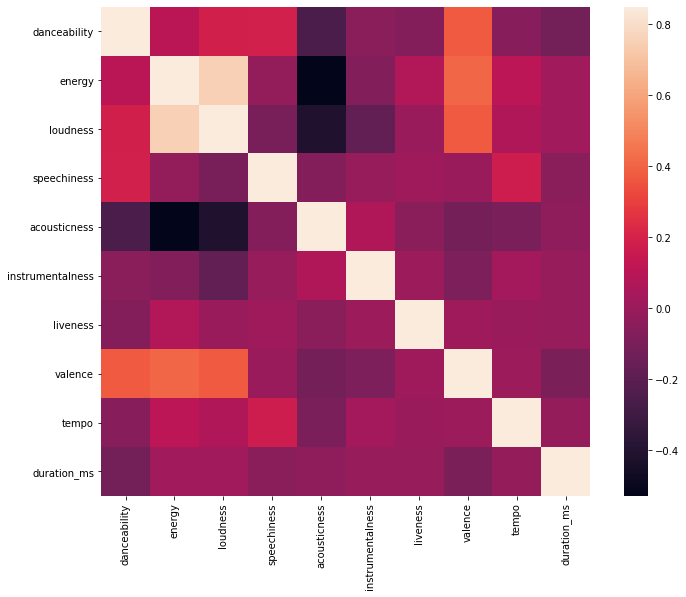

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

a = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
aa =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

cormat = a.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax= .85, square=True)
k = 10
cols = cormat.nlargest(k,aa[2])[aa[2]].index
cm = np.corrcoef(a[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)

KeyboardInterrupt: 

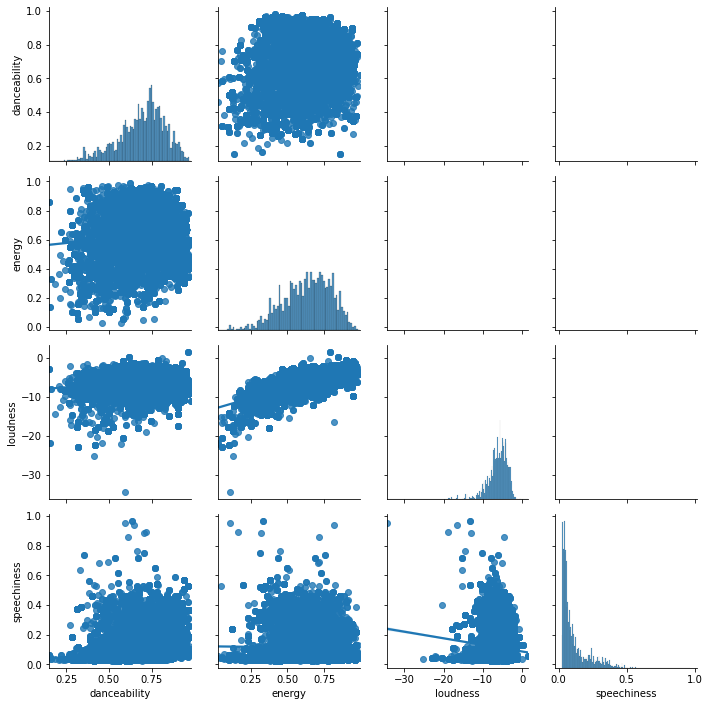

In [7]:
sns.pairplot(a[aa[0:3]], kind = "reg")

In [ ]:
semanal = df.groupby("start", as_index = False).agg(
    danceability = ("danceability","mean"),
    energy = ("energy","mean"),
    loudness = ("loudness","mean"),
    speechiness = ("speechiness","mean"),
    acousticness = ("acousticness","mean"),
    instrumentalness = ("instrumentalness","mean"),
    liveness = ("liveness","mean"),
    valence = ("valence","mean"),
    tempo = ("tempo","mean"),
    duration_ms = ("duration_ms","mean")
    )
semanal["id"] = [i for i in range(len(semanal))]

Text(0, 0.5, 'streams')

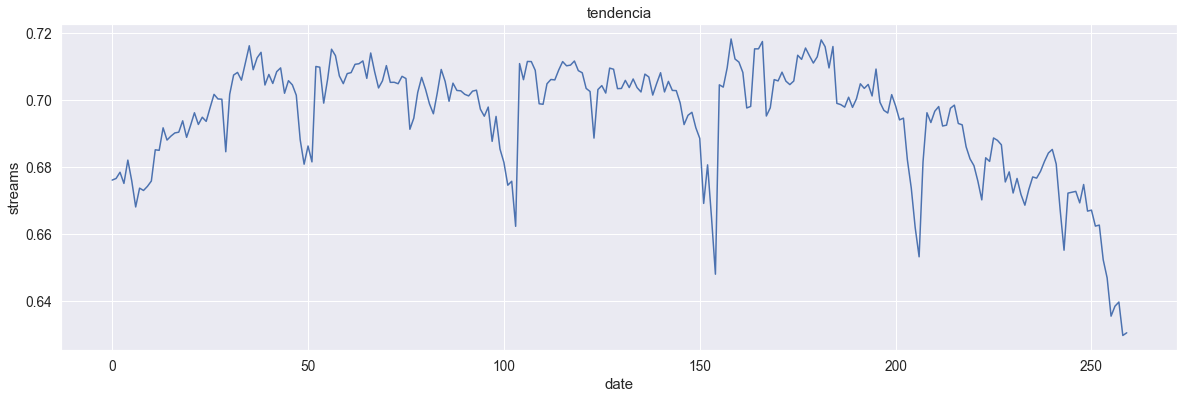

In [30]:
fig = plt.figure()
ax = semanal.danceability.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")

In [96]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from numpy import cov, var

beta = cov(semanal.index, semanal.danceability)
beta = beta[0,1]/beta[0,0]
alfa = semanal.danceability.mean() -  beta * semanal.id.mean()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = semanal.start,
    y = semanal.danceability,
    name = "Danzabilidad",
    
))
fig.add_trace(go.Scatter(
    x = semanal.start,
    y = semanal.id*beta + alfa,
    name='Tendencia',
    marker = {'color' : 'green'})),
    
fig.show()
go.Scatter


Text(0, 0.5, 'streams')

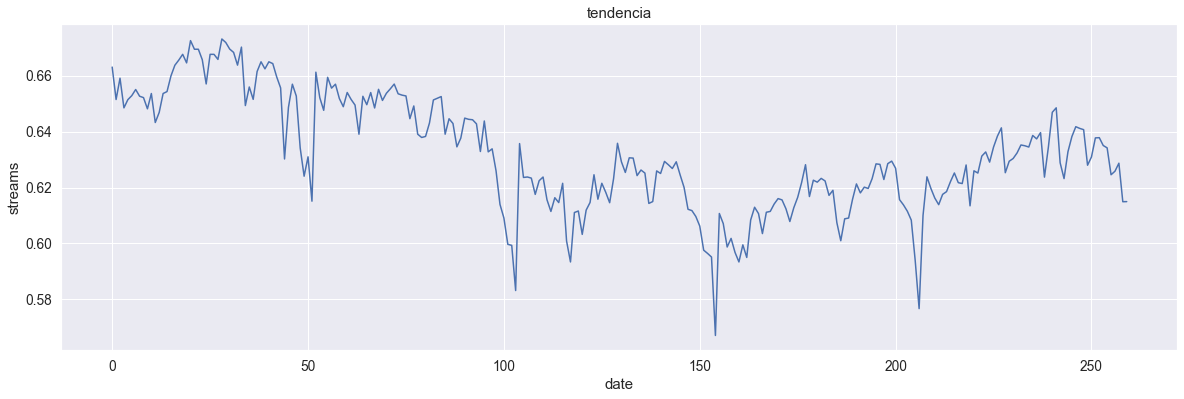

In [7]:
fig = plt.figure()
ax = semanal.energy.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

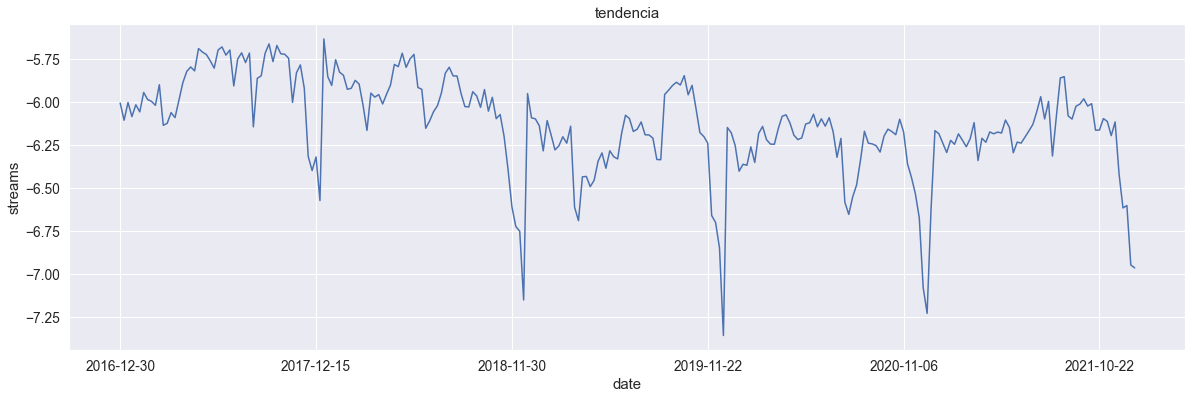

In [9]:
fig = plt.figure()
ax = semanal.loudness.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

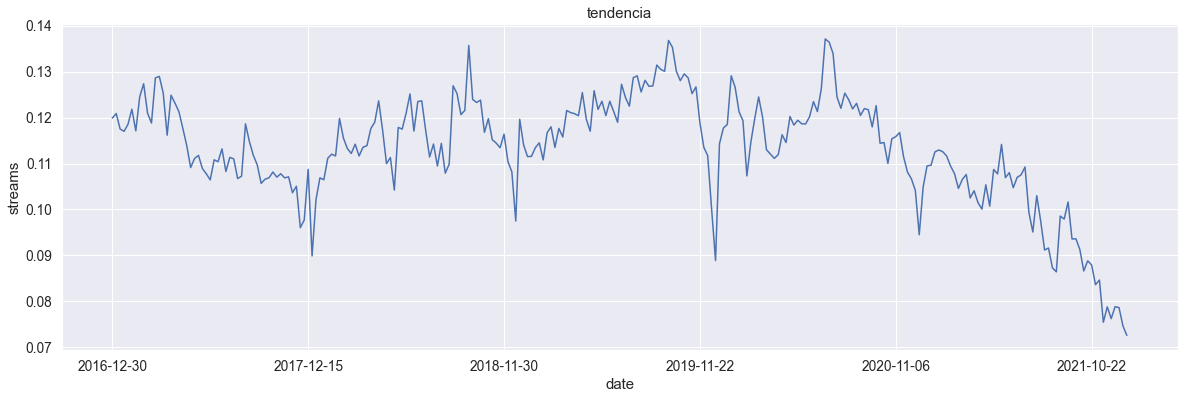

In [ ]:
fig = plt.figure()
ax = semanal.speechiness.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

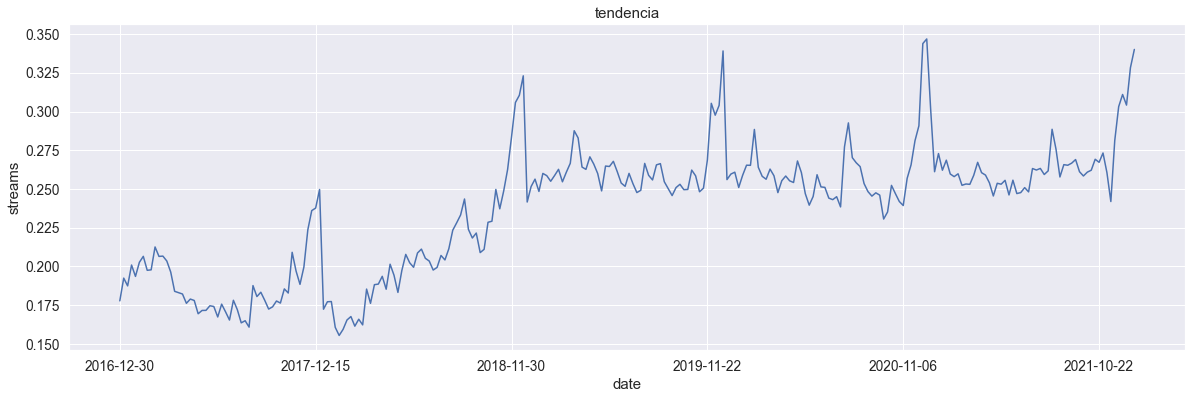

In [ ]:
fig = plt.figure()
ax = semanal.acousticness.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

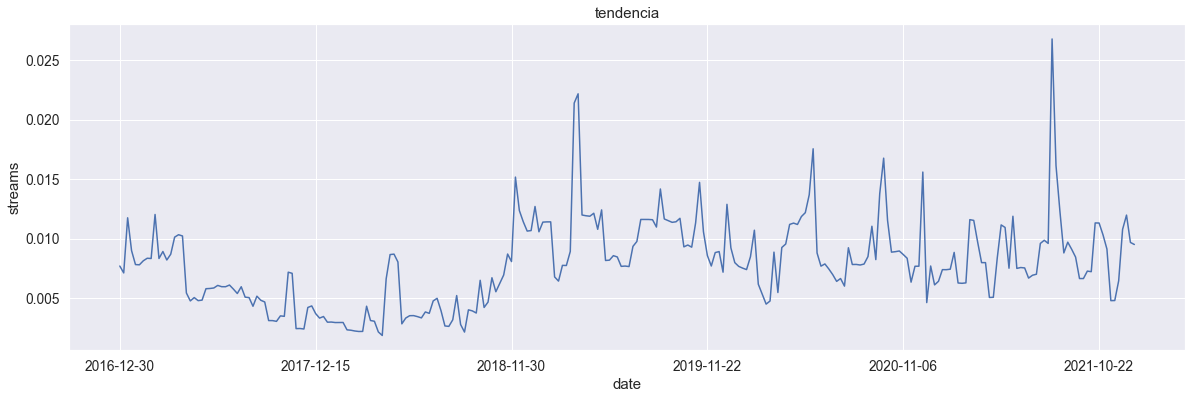

In [ ]:
fig = plt.figure()
ax = semanal.instrumentalness.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

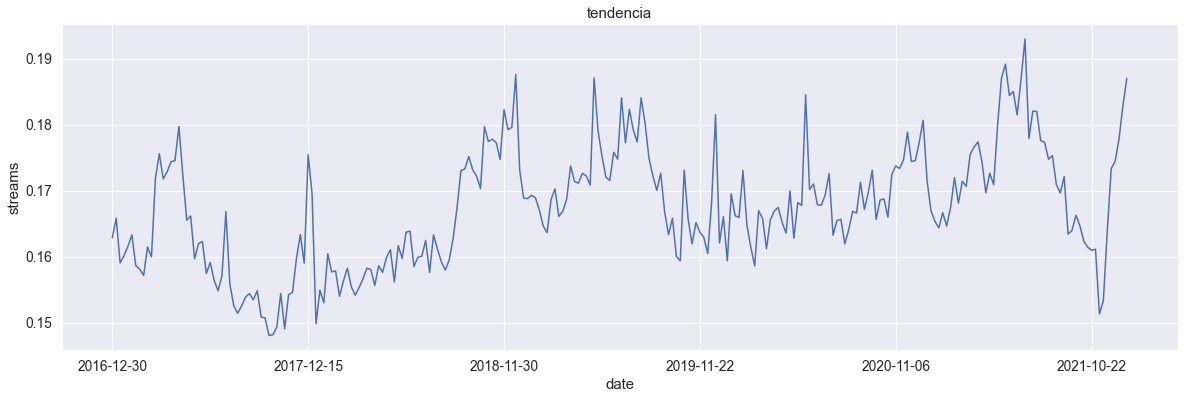

In [ ]:
fig = plt.figure()
ax = semanal.liveness.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

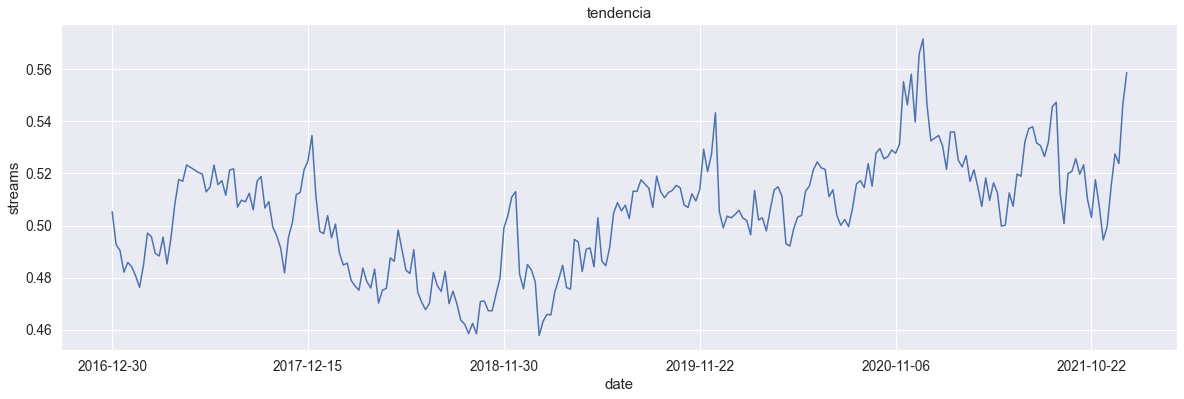

In [ ]:
fig = plt.figure()
ax = semanal.valence.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")


Text(0, 0.5, 'streams')

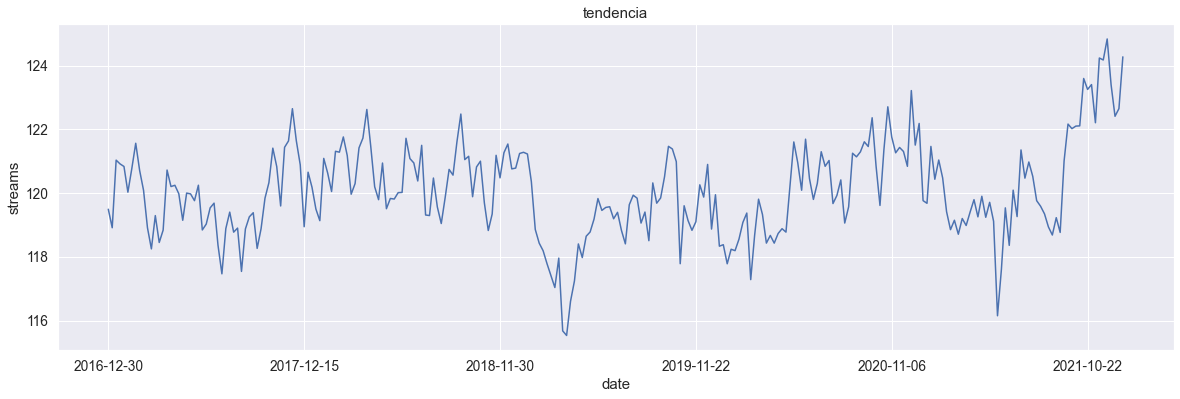

In [ ]:
fig = plt.figure()
ax = semanal.tempo.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")

Text(0, 0.5, 'streams')

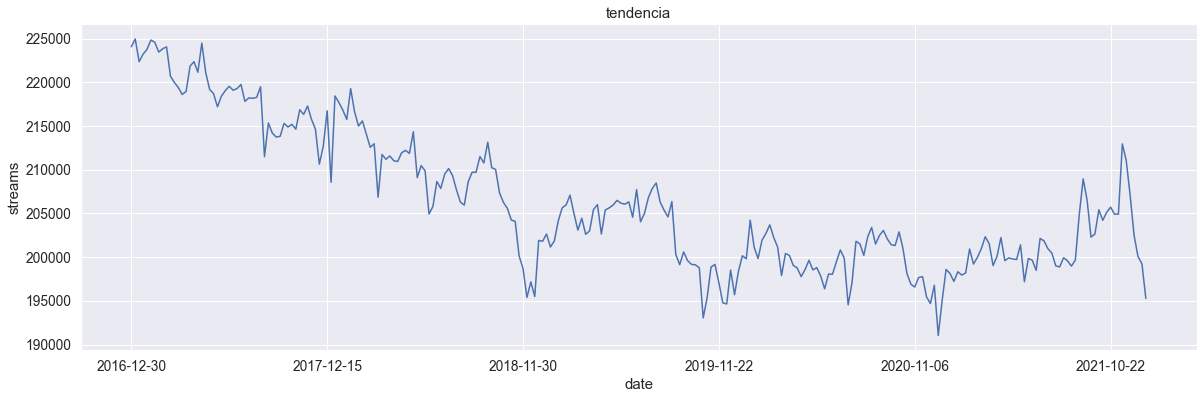

In [ ]:
fig = plt.figure()
ax = semanal.duration_ms.plot(title = "tendencia", grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")

In [ ]:
# Prueba de Box Pierce